In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


from scipy.stats import chisquare

from sklearn.impute import SimpleImputer

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
%matplotlib inline

%pylab inline

import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['chisquare']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Upload Data

In [2]:
import pandas as pd
df_wine = pd.read_csv("../input/hr-analytics/HR_comma_sep.csv")

In [3]:
df_wine.columns = ['satisfaction_level','last_evaluation','number_project',
        'average_montly_hours','time_spend_company','Work_accident','left',
        'promotion_last_5years','Department','salary']

In [4]:
df_wine.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


# Import label encoder salary

In [5]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'salary'. 
df_wine['salary']= label_encoder.fit_transform(df_wine['salary']) 
  
df_wine['salary'].unique()

array([1, 2, 0])

# label encoder Department

In [6]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'Department'. 
df_wine['Department']= label_encoder.fit_transform(df_wine['Department']) 
  
df_wine['Department'].unique() 

array([7, 2, 3, 9, 8, 4, 0, 6, 5, 1])

# chi2

In [7]:
X = df_wine.iloc[:,:-1]
y = df_wine.iloc[:,-1:]  
dfcolumns =pd.DataFrame(df_wine.columns) 

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)


In [9]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Chi2 Weights']
# print(featureScores.nlargest(len(data_frame.columns),'Score'))

In [10]:

# featureScores.plot(kind='bar', subplots=True, figsize=(20,20))
featureScores = featureScores.sort_values(by=['Chi2 Weights'], ascending=False)
display(featureScores)
display(featureScores.shape)

,Specs,Chi2 Weights
6,left,290.462020
7,promotion_last_5years,145.008319
8,Department,40.070240
4,time_spend_company,22.665090
3,average_montly_hours,11.374087
0,satisfaction_level,3.816073
5,Work_accident,1.292191
2,number_project,0.623815
1,last_evaluation,0.261557
9,salary,NaN


(10, 2)

# Training model

In [11]:
from sklearn.model_selection import train_test_split

feature_column_names = ['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','Department','salary']
predicted_class_name = ['left']

# Getting feature variable values
X = df_wine[feature_column_names].values
y = df_wine[predicted_class_name].values

# Splitting using scikit-learn train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)


# RandomForestClassifier Importances

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
df_wine.columns[:-1]
feat_labels = df_wine.columns[:]
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[f],importances[indices[f]]))
    


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


 1) satisfaction_level             0.345032
 2) last_evaluation                0.182678
 3) number_project                 0.180379
 4) average_montly_hours           0.143579
 5) time_spend_company             0.121260
 6) Work_accident                  0.012071
 7) left                           0.008336
 8) promotion_last_5years          0.005729
 9) Department                     0.000937


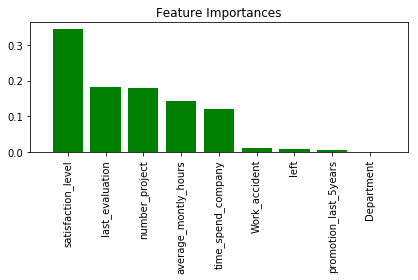

In [14]:
title('Feature Importances')
bar(range(X_train.shape[1]), importances[indices], 
                     color='green', align='center')
xticks(range(X_train.shape[1]),
feat_labels, rotation=90)
xlim([-1, X_train.shape[1]])
tight_layout()
show()

In [15]:
feature_column_names = ['satisfaction_level','last_evaluation','average_montly_hours','promotion_last_5years','Department']
predicted_class_name = ['left']

# Getting feature variable values
X = df_wine[feature_column_names].values
y = df_wine[predicted_class_name].values

# Splitting using scikit-learn train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)


 # After feature selection GaussianNB 

In [16]:
from sklearn.naive_bayes import GaussianNB


nb_model= GaussianNB()
nb_model.fit(X_train, y_train.ravel())  # ravel() return 1-D array

# get current accuracy of the model
prediction_from_trained_data = nb_model.predict(X_train)
accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)
print ("Accuracy of our GaussianNB model is : {0:.4f}".format(accuracy))

Accuracy of our GaussianNB model is : 0.7915


In [17]:
# this returns array of predicted results from test_data
prediction_from_test_data = nb_model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, prediction_from_test_data)

print ("Accuracy of our GaussianNB model is: {0:0.4f} %".format(accuracy))


print ("Confusion Matrix")
print ("{0}".format(metrics.confusion_matrix(y_test, prediction_from_test_data, labels=[1, 0])))

print ("Classification Report")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, prediction_from_test_data, labels=[1, 0])))

Accuracy of our GaussianNB model is: 0.7776 %
Confusion Matrix
[[ 573  499]
 [ 502 2926]]
Classification Report
              precision    recall  f1-score   support

           1       0.53      0.53      0.53      1072
           0       0.85      0.85      0.85      3428

    accuracy                           0.78      4500
   macro avg       0.69      0.69      0.69      4500
weighted avg       0.78      0.78      0.78      4500



# RandomForestClassifier

In [18]:
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train.ravel())

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [19]:
rf_predict_train = rf_model.predict(X_train)

rf_accuracy = metrics.accuracy_score(y_train, rf_predict_train)
print ("Accuracy: {0:.4f}".format(rf_accuracy))

Accuracy: 0.9963


In [20]:
rf_predict_test = rf_model.predict(X_test)

rf_accuracy_testdata = metrics.accuracy_score(y_test, rf_predict_test)
print ("Accuracy: {0:.4f}".format(rf_accuracy_testdata))

print ("Confusion Matrix for Random Forest")
print ("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test, labels=[1, 0])))
print ("")
print ("Classification Report\n")
print ("{0}".format(metrics.classification_report(y_test, rf_predict_test, labels=[1, 0])))

Accuracy: 0.9591
Confusion Matrix for Random Forest
[[ 970  102]
 [  82 3346]]

Classification Report

              precision    recall  f1-score   support

           1       0.92      0.90      0.91      1072
           0       0.97      0.98      0.97      3428

    accuracy                           0.96      4500
   macro avg       0.95      0.94      0.94      4500
weighted avg       0.96      0.96      0.96      4500



# SVM Model

In [21]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
svm_score_train = svm.score(X_train, y_train)
print("Training score: ",svm_score_train)
svm_score_test = svm.score(X_test, y_test)
print("Testing score: ",svm_score_test)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training score:  0.8695113820363845
Testing score:  0.8537777777777777


# Decision Tree

In [22]:

from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_score_train = dt.score(X_train, y_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(X_test, y_test)
print("Testing score: ",dt_score_test)

Training score:  0.9999047528336032
Testing score:  0.9504444444444444


# LogisticRegression model

In [23]:
from sklearn.linear_model import LogisticRegression

LogisticRegression(penalty='l1')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
logis = LogisticRegression()
logis.fit(X_train, y_train)
logis_score_train = logis.score(X_train, y_train)
print("Training score: ",logis_score_train)
logis_score_test = logis.score(X_test, y_test)
print("Testing score: ",logis_score_test)

Training score:  0.7748356986379655
Testing score:  0.7628888888888888


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# KNeighborsClassifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
knn_accuracy=knn.score(X_train, y_train)
print('Training accuracy:',knn_accuracy )
knn_accuracy_testdata = knn.score(X_test, y_test)
print('Test accuracy:',knn_accuracy_testdata )

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Training accuracy: 0.9655205257643585
Test accuracy: 0.8822222222222222


# All Comparison

In [26]:
#Model comparison
models = pd.DataFrame({
        'Model'          : ['Logistic Regression', 'SVM', 'kNN', 'Decision Tree', 'Random Forest','GaussianNB'],
        'Training_Score' : [logis_score_train, svm_score_train, knn_accuracy, dt_score_train, rf_accuracy, accuracy],
        'Testing_Score'  : [logis_score_test, svm_score_test, knn_accuracy_testdata, dt_score_test, rf_accuracy_testdata,accuracy ]
    })
models.sort_values(by='Testing_Score', ascending=False)

,Model,Training_Score,Testing_Score
4,Random Forest,0.996285,0.959111
3,Decision Tree,0.999905,0.950444
2,kNN,0.965521,0.882222
1,SVM,0.869511,0.853778
5,GaussianNB,0.777556,0.777556
0,Logistic Regression,0.774836,0.762889


 # After feature selection GaussianNB 

In [27]:
feature_column_names = ['satisfaction_level','last_evaluation','number_project',
                        'average_montly_hours','time_spend_company']
predicted_class_name = ['left']

# Getting feature variable values
X = df_wine[feature_column_names].values
y = df_wine[predicted_class_name].values

# Splitting using scikit-learn train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [28]:

nb_model= GaussianNB()
nb_model.fit(X_train, y_train.ravel())  # ravel() return 1-D array

# get current accuracy of the model
prediction_from_trained_data = nb_model.predict(X_train)
accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)
print ("Accuracy of our GaussianNB model is : {0:.4f}".format(accuracy))

Accuracy of our GaussianNB model is : 0.8032


# RandomForestClassifier

In [29]:
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train.ravel())

rf_predict_train = rf_model.predict(X_train)

rf_accuracy = metrics.accuracy_score(y_train, rf_predict_train)
print ("Accuracy: {0:.4f}".format(rf_accuracy))

Accuracy: 0.9975


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [30]:
rf_predict_test = rf_model.predict(X_test)

rf_accuracy_testdata = metrics.accuracy_score(y_test, rf_predict_test)
print ("Accuracy: {0:.4f}".format(rf_accuracy_testdata))

print ("Confusion Matrix for Random Forest")
print ("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test, labels=[1, 0])))
print ("")
print ("Classification Report\n")
print ("{0}".format(metrics.classification_report(y_test, rf_predict_test, labels=[1, 0])))

Accuracy: 0.9864
Confusion Matrix for Random Forest
[[1019   53]
 [   8 3420]]

Classification Report

              precision    recall  f1-score   support

           1       0.99      0.95      0.97      1072
           0       0.98      1.00      0.99      3428

    accuracy                           0.99      4500
   macro avg       0.99      0.97      0.98      4500
weighted avg       0.99      0.99      0.99      4500



# DecisionTreeClassifier

In [31]:

from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_score_train = dt.score(X_train, y_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(X_test, y_test)
print("Testing score: ",dt_score_test)

Training score:  0.9998095056672064
Testing score:  0.9788888888888889


# svm

In [32]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
svm_score_train = svm.score(X_train, y_train)
print("Training score: ",svm_score_train)
svm_score_test = svm.score(X_test, y_test)
print("Testing score: ",svm_score_test)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training score:  0.9635203352700257
Testing score:  0.9526666666666667


# KNeighborsClassifier


In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
knn_accuracy=knn.score(X_train, y_train)
print('Training accuracy:',knn_accuracy )
knn_accuracy_testdata = knn.score(X_test, y_test)
print('Test accuracy:',knn_accuracy_testdata )

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Training accuracy: 0.9903800361939232
Test accuracy: 0.9593333333333334


# LogisticRegression model

In [34]:
LogisticRegression(penalty='l1')
logis = LogisticRegression()
logis.fit(X_train, y_train)
logis_score_train = logis.score(X_train, y_train)
print("Training score: ",logis_score_train)
logis_score_test = logis.score(X_test, y_test)
print("Testing score: ",logis_score_test)

Training score:  0.7693113629869511
Testing score:  0.7595555555555555


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 # All comparison

In [35]:
#Model comparison
models = pd.DataFrame({
        'Model'          : ['Logistic Regression', 'SVM', 'kNN', 'Decision Tree', 'Random Forest','GaussianNB'],
        'Training_Score' : [logis_score_train, svm_score_train, knn_accuracy, dt_score_train, rf_accuracy, accuracy],
        'Testing_Score'  : [logis_score_test, svm_score_test, knn_accuracy_testdata, dt_score_test, rf_accuracy_testdata,accuracy ]
    })
models.sort_values(by='Testing_Score', ascending=False)

,Model,Training_Score,Testing_Score
4,Random Forest,0.997524,0.986444
3,Decision Tree,0.999810,0.978889
2,kNN,0.990380,0.959333
1,SVM,0.963520,0.952667
5,GaussianNB,0.803219,0.803219
0,Logistic Regression,0.769311,0.759556


In [36]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [37]:
MLP = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)

In [38]:
MLP.fit(X_train, y_train)
y_pred = MLP.predict(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 1.65761638
Iteration 2, loss = 0.57291441
Iteration 3, loss = 0.57113637
Iteration 4, loss = 0.57145382
Iteration 5, loss = 0.57111536
Iteration 6, loss = 0.56908500
Iteration 7, loss = 0.56721721
Iteration 8, loss = 0.56609078
Iteration 9, loss = 0.56374623
Iteration 10, loss = 0.56561672
Iteration 11, loss = 0.56198382
Iteration 12, loss = 0.56380342
Iteration 13, loss = 0.56290921
Iteration 14, loss = 0.56031747
Iteration 15, loss = 0.56194226
Iteration 16, loss = 0.56082748
Iteration 17, loss = 0.55931525
Iteration 18, loss = 0.55856173
Iteration 19, loss = 0.55770043
Iteration 20, loss = 0.55758727
Iteration 21, loss = 0.55694324
Iteration 22, loss = 0.55531761
Iteration 23, loss = 0.55650492
Iteration 24, loss = 0.55417669
Iteration 25, loss = 0.55512467
Iteration 26, loss = 0.55566243
Iteration 27, loss = 0.55261479
Iteration 28, loss = 0.55250984
Iteration 29, loss = 0.55116489
Iteration 30, loss = 0.54983769
Iteration 31, loss = 0.54972590
Iteration 32, los

In [39]:
cl = accuracy_score(y_test, y_pred)

In [40]:
print(cl)

0.7617777777777778


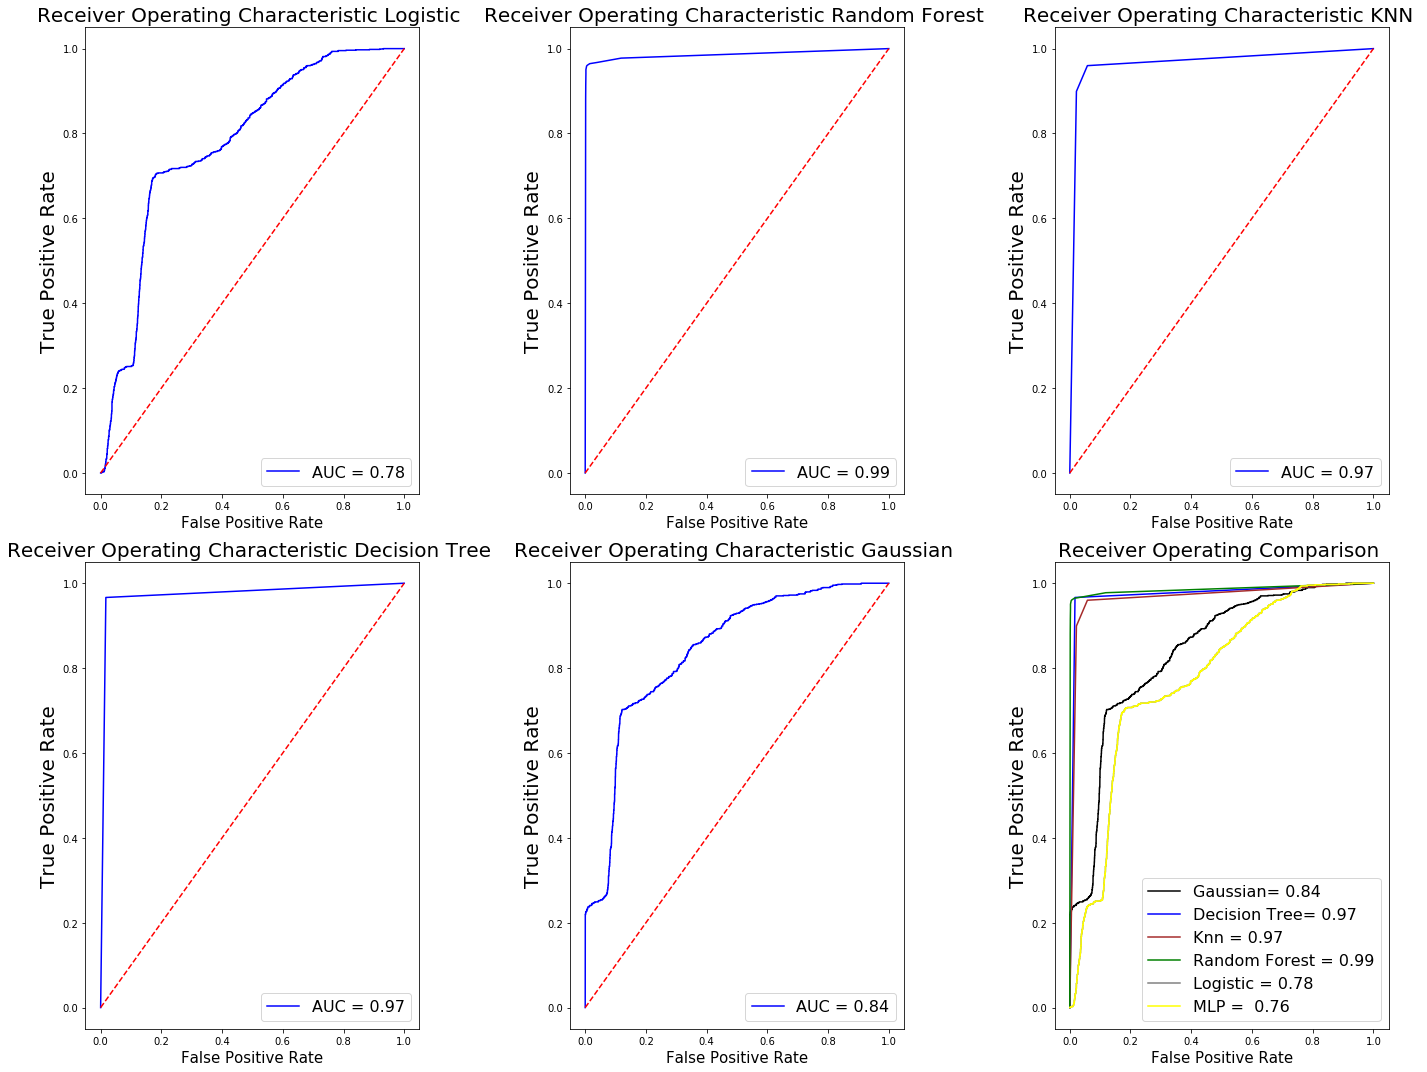

In [41]:
#fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 4))
fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (20,15))

#LOGMODEL
probs = logis.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Receiver Operating Characteristic Logistic ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})



#RANDOM FOREST --------------------
probs = rf_model.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[0,1].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})

#KNN----------------------
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y_test, preds)
roc_aucknn = metrics.auc(fprknn, tprknn)

ax_arr[0,2].plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucknn)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('Receiver Operating Characteristic KNN ',fontsize=20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})


#DECISION TREE ---------------------
probs = dt.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[1,0].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('Receiver Operating Characteristic Decision Tree ',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})

#GAUSSIAN ---------------------
probs = nb_model.predict_proba(X_test)
preds = probs[:,1]
fprgau, tprgau, thresholdgau = metrics.roc_curve(y_test, preds)
roc_aucgau = metrics.auc(fprgau, tprgau)

ax_arr[1,1].plot(fprgau, tprgau, 'b', label = 'AUC = %0.2f' % roc_aucgau)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('Receiver Operating Characteristic Gaussian ',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

#ALL PLOTS ----------------------------------
ax_arr[1,2].plot(fprgau, tprgau, 'b', label = 'Gaussian= %0.2f' % roc_aucgau, color='black')
ax_arr[1,2].plot(fprdtree, tprdtree, 'b', label = 'Decision Tree= %0.2f' % roc_aucdtree, color='blue')
ax_arr[1,2].plot(fprknn, tprknn, 'b', label = 'Knn = %0.2f' % roc_aucknn, color='brown')
ax_arr[1,2].plot(fprrfc, tprrfc, 'b', label = 'Random Forest = %0.2f' % roc_aucrfc, color='green')
ax_arr[1,2].plot(fprlog, tprlog, 'b', label = 'Logistic = %0.2f' % roc_auclog, color='grey')
ax_arr[1,2].plot(fprlog, tprlog, 'b', label = 'MLP =  %0.2f ' %cl , color='yellow')
ax_arr[1,2].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 

In [42]:
import keras
#For building the Neural Network layer by layer
from keras.models import Sequential
#To randomly initialize the weights to small numbers close to 0(But not 0)
from keras.layers import Dense

Using TensorFlow backend.


In [43]:
model = Sequential()

# Add the first layer
# input_dim=   has to be the number of input variables. 
# It represent the number of inputs in the first layer,one per column 
model.add(Dense(12, input_dim=5, activation='relu'))

# Add the second layer
model.add(Dense(8, activation='relu'))

# Add the output layer
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X, y, epochs=100, batch_size=10)

Epoch 1/100
14999/14999 [==============================] - 2s 146us/step - loss: 0.7870 - accuracy: 0.7314
Epoch 2/100
14999/14999 [==============================] - 2s 124us/step - loss: 0.5483 - accuracy: 0.7529
Epoch 3/100
14999/14999 [==============================] - 2s 129us/step - loss: 0.5246 - accuracy: 0.7494
Epoch 4/100
14999/14999 [==============================] - 2s 137us/step - loss: 0.5139 - accuracy: 0.7497
Epoch 5/100
14999/14999 [==============================] - 2s 153us/step - loss: 0.5082 - accuracy: 0.7520
Epoch 6/100
14999/14999 [==============================] - 2s 121us/step - loss: 0.5013 - accuracy: 0.7513
Epoch 7/100
14999/14999 [==============================] - 2s 138us/step - loss: 0.5017 - accuracy: 0.7507
Epoch 8/100
14999/14999 [==============================] - 2s 126us/step - loss: 0.4968 - accuracy: 0.7515
Epoch 9/100
14999/14999 [==============================] - 2s 133us/step - loss: 0.4928 - accuracy: 0.7532
Epoch 10/100
14999/14999 [===========

In [44]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [45]:
print(y_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3294  134]
 [ 210  862]]


In [47]:
print(accuracy)

0.8032193542242119
